<a href="https://colab.research.google.com/github/sarthag/Time-Sequence-Prediction/blob/main/Time_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F 
import time

In [ ]:
L = 2010  #length of sample
T = 16   #width of wave

In [ ]:
#creating a sine wave
x = np.empty((L), np.float32)
x[:] = np.array(range(L)) + np.random.randint(-4*T, 4*T)
y = np.sin(x/1.0/T).astype(np.float32)

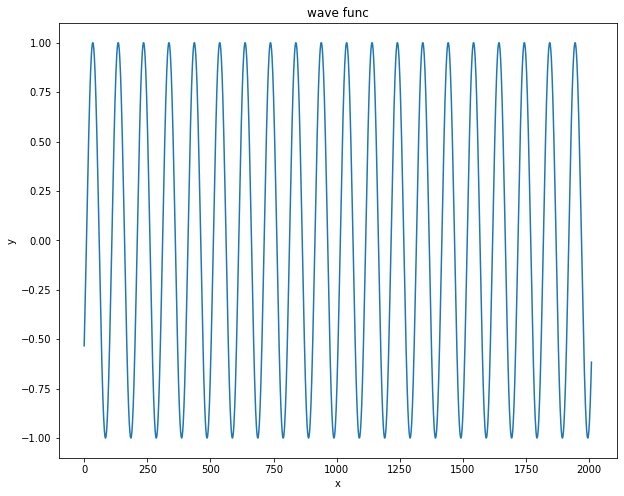

In [ ]:
plt.figure(figsize = (10,8))
plt.title("wave func")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.plot(np.arange(x.shape[0]), y)
plt.show()

In [ ]:
def train_test_split(input_data, window, test_percent):
  data_seq= []
  L= len(input_data) - window

  for i in range(L):
    data_seq.append(input_data[i:i+window+1])  

  data_seq = np.array(data_seq)
  test_size = int(np.round(L*test_percent))
  data_train = data_seq[:-test_size, :-1, :]
  targets_train = data_seq[:-test_size, -1, :]
  data_test = data_seq[-test_size:, :-1, :]
  targets_test = data_seq[-test_size:, -1, :]

  return torch.from_numpy(data_train), torch.from_numpy(targets_train), torch.from_numpy(data_test), torch.from_numpy(targets_test)

In [ ]:
data_train, targets_train, data_test, targets_test = train_test_split(y.reshape(-1,1), 10, 0.5)
print(data_train.shape)
print(targets_train.shape)
print(data_test.shape)
print(targets_test.shape)

torch.Size([1000, 10, 1])
torch.Size([1000, 1])
torch.Size([1000, 10, 1])
torch.Size([1000, 1])


In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size = 1, hidden_size = 50, num_layers = 2, num_classes  = 1):
    super(LSTM,self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
    self.fc = nn.Linear(hidden_size, num_classes)


  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

    out, _ = self.lstm(x, (h0,c0))
    out = self.fc(out[:, -1, :])
    
    return out

In [ ]:
model = LSTM()
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


Epoch: 1/50, loss: 0.5180, time: 0.186
 


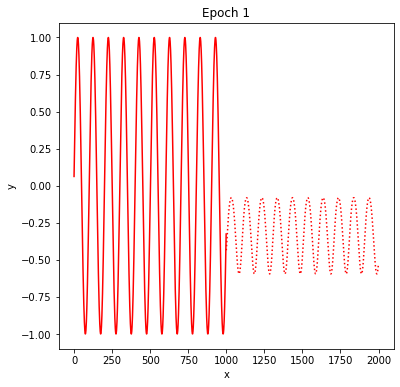

 
Epoch: 2/50, loss: 0.3842, time: 0.151
 
Epoch: 3/50, loss: 0.7847, time: 0.144
 
Epoch: 4/50, loss: 0.4727, time: 0.146
 
Epoch: 5/50, loss: 0.2992, time: 0.146
 
Epoch: 6/50, loss: 0.3219, time: 0.145
 
Epoch: 7/50, loss: 0.1889, time: 0.153
 
Epoch: 8/50, loss: 0.2294, time: 0.148
 
Epoch: 9/50, loss: 0.1344, time: 0.150
 
Epoch: 10/50, loss: 0.1340, time: 0.139
 


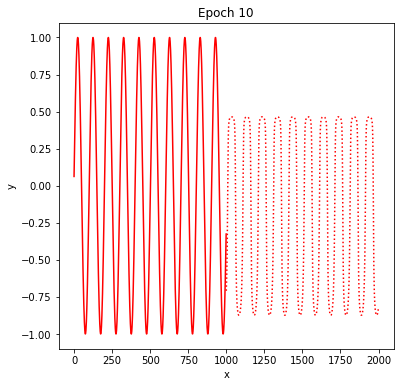

 
Epoch: 11/50, loss: 0.1040, time: 0.152
 
Epoch: 12/50, loss: 0.0935, time: 0.148
 
Epoch: 13/50, loss: 0.0727, time: 0.140
 
Epoch: 14/50, loss: 0.0327, time: 0.152
 
Epoch: 15/50, loss: 0.0304, time: 0.135
 
Epoch: 16/50, loss: 0.0150, time: 0.139
 
Epoch: 17/50, loss: 0.0220, time: 0.154
 
Epoch: 18/50, loss: 0.0112, time: 0.151
 
Epoch: 19/50, loss: 0.0067, time: 0.141
 
Epoch: 20/50, loss: 0.0093, time: 0.146
 


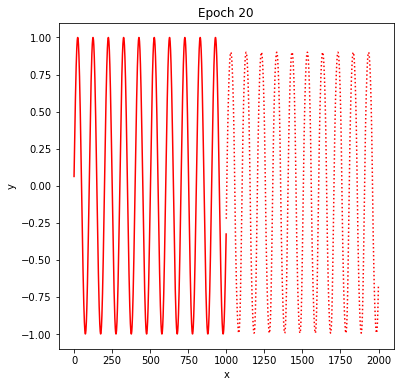

 
Epoch: 21/50, loss: 0.0033, time: 0.166
 
Epoch: 22/50, loss: 0.0099, time: 0.140
 
Epoch: 23/50, loss: 0.0050, time: 0.146
 
Epoch: 24/50, loss: 0.0026, time: 0.146
 
Epoch: 25/50, loss: 0.0052, time: 0.139
 
Epoch: 26/50, loss: 0.0016, time: 0.144
 
Epoch: 27/50, loss: 0.0027, time: 0.140
 
Epoch: 28/50, loss: 0.0040, time: 0.151
 
Epoch: 29/50, loss: 0.0008, time: 0.135
 
Epoch: 30/50, loss: 0.0027, time: 0.166
 


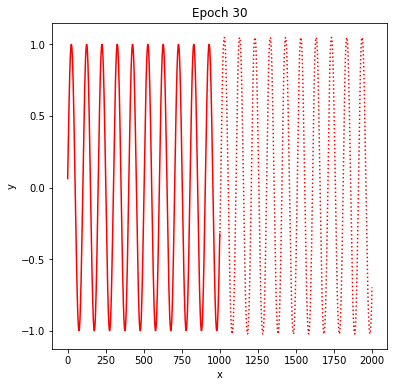

 
Epoch: 31/50, loss: 0.0023, time: 0.155
 
Epoch: 32/50, loss: 0.0008, time: 0.149
 
Epoch: 33/50, loss: 0.0019, time: 0.138
 
Epoch: 34/50, loss: 0.0016, time: 0.139
 
Epoch: 35/50, loss: 0.0005, time: 0.143
 
Epoch: 36/50, loss: 0.0011, time: 0.144
 
Epoch: 37/50, loss: 0.0010, time: 0.137
 
Epoch: 38/50, loss: 0.0002, time: 0.149
 
Epoch: 39/50, loss: 0.0010, time: 0.157
 
Epoch: 40/50, loss: 0.0006, time: 0.142
 


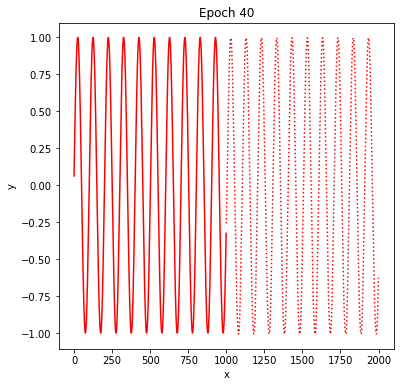

 
Epoch: 41/50, loss: 0.0003, time: 0.158
 
Epoch: 42/50, loss: 0.0007, time: 0.152
 
Epoch: 43/50, loss: 0.0005, time: 0.135
 
Epoch: 44/50, loss: 0.0002, time: 0.142
 
Epoch: 45/50, loss: 0.0006, time: 0.140
 
Epoch: 46/50, loss: 0.0003, time: 0.148
 
Epoch: 47/50, loss: 0.0002, time: 0.143
 
Epoch: 48/50, loss: 0.0004, time: 0.145
 
Epoch: 49/50, loss: 0.0002, time: 0.139
 
Epoch: 50/50, loss: 0.0002, time: 0.154
 


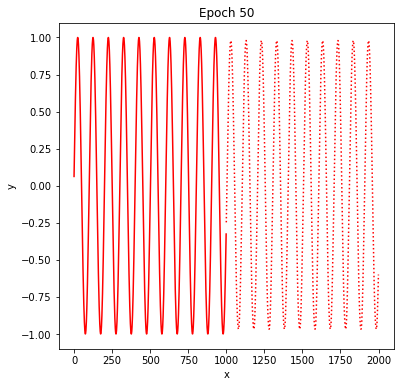

In [ ]:
epochs = 50
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.05)
n_train = data_train.shape[0]
n_test = data_test.shape[0]


for epoch in range (epochs):
  start = time.process_time()
  preds = model(data_train)
  loss = loss_fn(preds, targets_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    preds_test = model(data_test)
    preds_test = preds_test.detach().numpy()
  end = time.process_time()


  print("Epoch: {}/{}, loss: {:.4f}, time: {:.3f}".format(epoch+1, epochs, loss, end - start))
  print(' ')

  if ((epoch+1) % 10 == 0) or (epoch == 0):
    plt.figure(figsize = (6,6))
    plt.title(f"Epoch {epoch+1}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.plot(np.arange(n_train) , targets_train, 'r')
    plt.plot(np.arange(n_train, n_train+n_test), preds_test, 'r' + ":")
    plt.show()
    print(" ")